## Linear Regression Example with pyTorch

First, we implement a gradient descent algorithm for reference, using numpy only

In [22]:
%matplotlib inline
import matplotlib.pylab as plt

import time
from IPython import display
import numpy as np


#y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
#y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
N = len(x)

# Design matrix
A = np.vstack((np.ones(N), x)).T

# Learning rate

eta = 0.01
              
# initial parameters
w = np.array([2., 1.])

for epoch in range(10):
    # Error
    err = y-A.dot(w)
    
    # Average error
    E = np.sum(err**2)/N
    
    # Gradient
    dE = -2.*A.T.dot(err)/N
    
    if epoch%1 == 0: 
        print(epoch,':',E)
        # print(w)    

    # Perfom one descent step
    w = w - eta*dE

0 : 15.9938818182
1 : 11.6346546383
2 : 8.57455118197
3 : 6.4263659935
4 : 4.91830088281
5 : 3.85956758638
6 : 3.11624261595
7 : 2.5943186121
8 : 2.2278072717
9 : 1.97038821883


### Animated Visualization of Gradient Descent

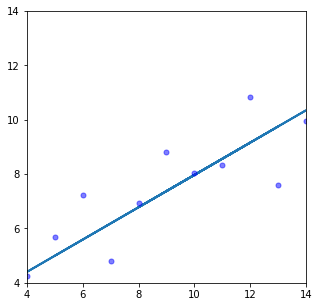

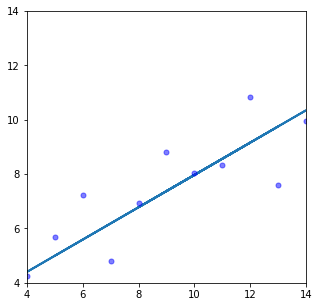

In [11]:

              
w = np.array([2., 1.])

f = A.dot(w)

fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.set_xlim((4,14))
ax.set_ylim((4,14))
ln = plt.Line2D(xdata=x, ydata=f, linestyle='-',linewidth=2)
ax.add_line(ln)

plt.plot(x,y,'bo', alpha=0.5, markersize=5)

for epoch in range(30):
    f = A.dot(w)
    err = y-f
    
    ln.set_xdata(x)
    ln.set_ydata(f)
    
    E = np.sum(err**2)/N
    dE = -2.*A.T.dot(err)/N
    
    if epoch%1 == 0: 
        print(epoch,':',E)
        # print(w)    
        
    w = w - eta*dE


    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)


    

## Implementation in pyTorch

### Fitting a polynomial

In [20]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

import torch
import torch.autograd
from torch.autograd import Variable

x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
yy = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y = Variable(torch.DoubleTensor(yy))

# Setup the feature (vandermonde) matrix
N = len(x)
degree = 2
xx = np.vstack((np.power(x,i) for i in range(degree+1))).T
# Create the system matrix
A = Variable(torch.from_numpy(xx).double())
w = Variable(torch.randn(degree+1).double(), requires_grad=True)
# learning rate
eta = 0.00005

for epoch in range(10000):
    ## Compute the forward pass
    f = torch.matmul(A, w)
    #print(f)
    E = torch.sum((y-f)**2)/N

    if epoch%1000 == 0: 
        print(epoch,':',E.data[0])

    # Compute the gradients by automated differentiation
    E.backward()
    
    # For each adjustable parameter 
    # Move along the negative gradient direction
    w.data.add_(-eta * w.grad.data)
    #print(w.grad.data)
    
    # Reset the gradients, as otherwise they are accumulated in param.grad
    w.grad.zero_()
    
print(epoch,':',E.data[0])

0 : 514.2779395281007
1000 : 8.446857793746629
2000 : 3.7475463453276188
3000 : 2.0847128022632533
4000 : 1.496324441917644
5000 : 1.2881240804828573
6000 : 1.2144516778783623
7000 : 1.1883814424746209
8000 : 1.1791550415384096
9000 : 1.1758887659269162
9999 : 1.1747321198383238


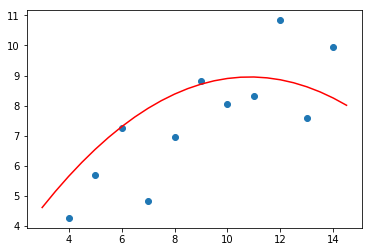

In [17]:
plt.plot(x, y.data.numpy().squeeze(),'o')

x2 = np.arange(3,15,0.5)
xx = np.vstack((np.power(x2,i) for i in range(degree+1))).T
AA = Variable(torch.from_numpy(xx).double())

f = torch.matmul(AA, w)

plt.plot(x2, f.data.numpy(),'r-')
plt.show()

## Fitting a line, using a linear unit

In [21]:

import torch
import torch.autograd
from torch.autograd import Variable

## The rows correspond to examples and the columns to features.
## There is only one feature so the Tensors are actually just vectors
x = torch.FloatTensor([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]]).transpose_(0,1)
#yy = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
yy = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y = torch.FloatTensor([yy]).transpose_(0,1)


# This is a linear unit that implements the function f(x) = weight*x + bias
f = torch.nn.Linear(1, 1, bias=True)

# Set w_1
f.weight.data = torch.FloatTensor([[1.]])
# Set w_0
f.bias.data = torch.FloatTensor([[2.]])

# learning rate
eta = 0.01

# This is the error function E(x, y) = (1/N) \sum_{i=1}^N (x_i-y_i)^2
EuclidianLoss = torch.nn.MSELoss(size_average=True)

for epoch in range(10):
    ## Compute the forward pass
    E = EuclidianLoss(f(Variable(x)), Variable(y))

    if epoch%1 == 0: 
        print(epoch,':',E.data[0])
#        print(f.bias.data.numpy())
#        print(f.weight.data.numpy())

    # Compute the gradients by automated differentiation
    E.backward()
    
    # For each adjustable parameter 
    # Move along the negative gradient direction
    for param in f.parameters():
        param.data.add_(-eta * param.grad.data)

    # Reset the gradients, as otherwise they are accumulated in param.grad
    f.zero_grad()

#print('Weights')
#print(f.weight.data, f.bias.data)

0 : 15.993881225585938
1 : 11.634653091430664
2 : 8.574551582336426
3 : 6.426366806030273
4 : 4.918301105499268
5 : 3.8595666885375977
6 : 3.1162407398223877
7 : 2.59431791305542
8 : 2.2278072834014893
9 : 1.970388412475586


### Fitting a polynomial, using a linear unit

In [26]:
import torch
import torch.autograd
from torch.autograd import Variable

## The rows correspond to examples and the columns to features.
## There is only one feature so the Tensors are actually just vectors
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
#yy = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
yy = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y = torch.DoubleTensor([yy]).transpose_(0,1)

# Setup the feature (vandermonde) matrix
N = len(x)
degree = 2
xx = np.vstack((np.power(x,i) for i in range(degree+1))).T
A = torch.from_numpy(xx)

# This is a linear unit that implements the function f(x) = weight*x + bias
f = torch.nn.Linear(degree+1, 1, bias=False).double()


# learning rate
eta = 0.00005

# This is the error function E(f, y) = (1/N) \sum_{i=1}^N (f_i-y_i)^2
EuclidianLoss = torch.nn.MSELoss(size_average=True)

for epoch in range(10000):
    ## Compute the forward pass
    E = EuclidianLoss(f(Variable(A)), Variable(y))

    if epoch%1000 == 0: 
        print(epoch,':',E.data[0])
#        print(f.bias.data.numpy())
#        print(f.weight.data.numpy())

    # Compute the gradients by automated differentiation
    E.backward()
    
    # For each adjustable parameter 
    # Move along the negative gradient direction
    for param in f.parameters():
        param.data.add_(-eta * param.grad.data)

    # Reset the gradients, as otherwise they are accumulated in param.grad
    f.zero_grad()
    
print(epoch,':',E.data[0])

RuntimeError: Expected object of type Variable[torch.DoubleTensor] but found type Variable[torch.FloatTensor] for argument #1 'mat2'

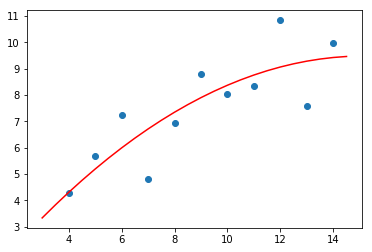

In [24]:

plt.plot(x, y.numpy(),'o')

x2 = np.arange(3,15,0.5)
xx = np.vstack((np.power(x2,i) for i in range(degree+1))).T
A = torch.from_numpy(xx)

plt.plot(x2, f(Variable(A)).data.numpy(),'r-')
plt.show()

## Autograd : Automatic differentiation example

In [8]:
import torch
from torch.autograd import Variable

x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

y = x + 2
print(y)

z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [210]:
out.backward()
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



Calculating and plotting the the derivative of a function using autodiff

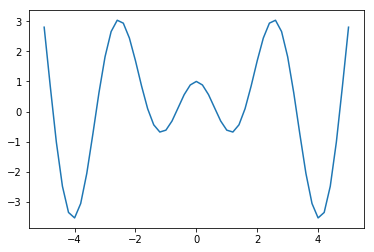

In [22]:
%matplotlib inline
import matplotlib.pylab as plt

x = Variable(torch.arange(-5,5,0.2), requires_grad=True)
#print(x)

#y = torch.sum(torch.sigmoid(0.3*x))
y = torch.sum(x*torch.cos(x)**2)
#print(y)

#plt.plot(x.data.numpy(), y.data.numpy() )
#plt.show()

y.backward()
plt.plot(x.data.numpy(), x.grad.data.numpy() )
plt.show()


$$
f(x_1, x_2) = \sin\left(\frac{1}{2} x_1^2 - \frac{1}{4} x_2^2 + 3 \right) \cos\left(2 x_1+1-e^{x_2}\right)
$$

In [100]:
import torch as tr
from torch.autograd import Variable

x_1 = Variable( tr.FloatTensor([0.5]) , requires_grad=True)
x_2 = Variable( tr.FloatTensor([3.5]) , requires_grad=True)

u1 = x_1 ** 2 
u2 = 0.5 * u1
u3 = x_2 ** 2
u4 =-0.25 * u3
u5 = u2 + u4
u6 = u5 + 3
u7 = tr.sin(u6)
u8 = 2 * x_1
u9 = u8 + 1
u10 = tr.exp(x_2)
u11 = -1 * u10
u12 = u9 + u11
u13 = tr.cos(u12)
f = u7 * u13

print(f.data)


1.00000e-02 *
  5.9661
[torch.FloatTensor of size 1]



In [46]:
f.backward()

print(x_1.grad.data)
print(x_2.grad.data)


1.00000e-02 *
  5.9661
[torch.FloatTensor of size 1]


 0.4397
[torch.FloatTensor of size 1]


-1.0561
[torch.FloatTensor of size 1]



In [49]:
u7.backward()

In [50]:
x_1.grad.data


 0.4990
[torch.FloatTensor of size 1]

$$f(x_1, x_2) = x_1^2$$

In [32]:
x_1 = Variable( tr.FloatTensor([-4]) , requires_grad=True)
x_2 = Variable( tr.FloatTensor([3]) , requires_grad=True)

f = x_1**2 + 2*x_2**2

print(f.data)

f.backward()

print(x_1.grad.data)
print(x_2.grad.data)




 34
[torch.FloatTensor of size 1]


-8
[torch.FloatTensor of size 1]


 12
[torch.FloatTensor of size 1]



In [ ]:
A = torch.DoubleTensor([[1,2,3],[4,5,6]])
T = torch.rand([3,5,2])
u = torch.DoubleTensor([[7],[8]])
w = torch.rand([5,3]).double()